In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, UpSampling2D, BatchNormalization, Activation, Dropout
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/Images'

train_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(path, target_size=(64, 64), batch_size=3312, class_mode=None)


Found 3312 images belonging to 2 classes.


In [ ]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128 ) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)

(3312, 64, 64, 1)
(3312, 64, 64, 2)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 256)      

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile( loss='mse' , metrics=['accuracy'])

Epoch 1/200
30/30 [==============================] - 3s 108ms/step - loss: 0.0161 - accuracy: 0.5734 - val_loss: 0.0168 - val_accuracy: 0.5887
Epoch 2/200
30/30 [==============================] - 3s 107ms/step - loss: 0.0160 - accuracy: 0.6157 - val_loss: 0.0175 - val_accuracy: 0.5556
Epoch 3/200
30/30 [==============================] - 3s 107ms/step - loss: 0.0159 - accuracy: 0.6237 - val_loss: 0.0153 - val_accuracy: 0.6529
Epoch 4/200
30/30 [==============================] - 3s 107ms/step - loss: 0.0149 - accuracy: 0.6412 - val_loss: 0.0159 - val_accuracy: 0.6293
Epoch 5/200
30/30 [==============================] - 3s 108ms/step - loss: 0.0150 - accuracy: 0.6380 - val_loss: 0.0165 - val_accuracy: 0.6221
Epoch 6/200
30/30 [==============================] - 3s 107ms/step - loss: 0.0145 - accuracy: 0.6537 - val_loss: 0.0177 - val_accuracy: 0.5289
Epoch 7/200
30/30 [==============================] - 3s 108ms/step - loss: 0.0144 - accuracy: 0.6434 - val_loss: 0.0149 - val_accuracy: 0.6544

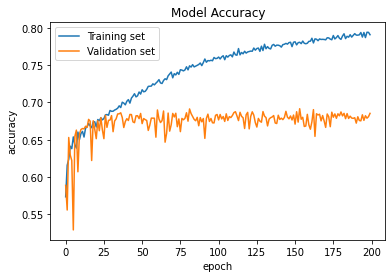

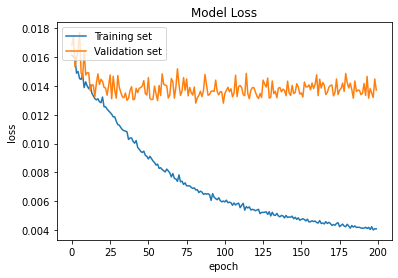

In [ ]:
history = model.fit(X,Y,validation_split=0.1, epochs=200, batch_size=100)

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Image Colourization/Landscape_Model/Colourizer3(Landscape).model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Image Colourization/Landscape_Model/Colourizer3(Landscape).model/assets


In [8]:
model = keras.models.load_model('/content/drive/MyDrive/Image Colourization/Landscape_Model/Colourizer3(Landscape).model')

In [9]:
def predict(filename):
  img1_color=[]
  img1=img_to_array(load_img(filename))
  img1 = resize(img1 ,(64,64))
  img1_color.append(img1)
  img1_color = np.array(img1_color, dtype=float)
  img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
  img1_color = img1_color.reshape(img1_color.shape+(1,))
  output1 = model.predict(img1_color)
  output1 = output1*128
  result = np.zeros((64, 64, 3))
  result[:,:,0] = img1_color[0][:,:,0]
  result[:,:,1:] = output1[0]
  img= load_img(filename)
  img2 = lab2rgb(result)
  Titles =["Original", "Prediction"]
  images =[img, img2]
  count = 2
  
  for i in range(count):
      plt.subplot(1, 2, i + 1)
      plt.title(Titles[i])
      plt.imshow(images[i])
  
  plt.show()
 

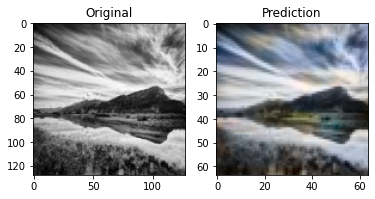

In [ ]:
predict('/content/Test-images/download.jpg')

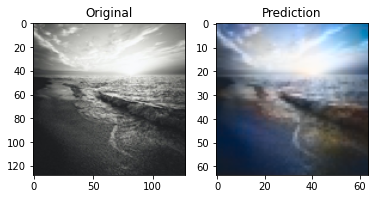

In [ ]:
predict('/content/Test-images/Landscape2.jpg')

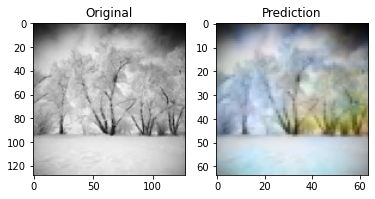

In [ ]:
predict('/content/Test-images/Landscape3.jpg')

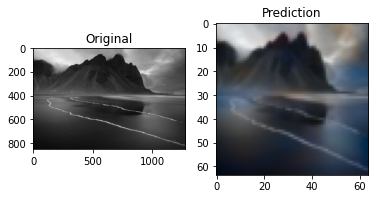

In [10]:
predict('/content/Test_Image/Test1.jpeg')